In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data_bankruptcy.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


---

## 결측치 확인

In [3]:
print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


---

## PCA 

##### (변수가 너무 많기 때문에, 대체할 수 있는 새로운 변수들을 찾아 변수를 찾아 연산량 낮추고 예측성능 높이기 위한 목적)

In [4]:
from sklearn.preprocessing import StandardScaler

X = df.drop(["Bankrupt?"], axis=1).values
y = df["Bankrupt?"].values

X = StandardScaler().fit_transform(X)

features = df.columns.drop("Bankrupt?")
pd.DataFrame(X, columns=features)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,0.0,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,0.0,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,0.0,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,0.0,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540708,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,0.0,-0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204969,0.018215,0.017036,0.018197,-0.010092,0.016277,...,-0.194231,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,0.0,-0.353693
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.198659,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,0.0,-0.185856
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.247517,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,0.0,1.001206
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,0.100366,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,0.0,-0.071364


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
printcipalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=printcipalComponents)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.13346977 0.07213753]
0.20560729772064346


##### 대체할 변수 2개로 추출하려 했지만, 추출한 2개의 변수들이 원래 변수들의 약 20%밖에 설명하지 못한다. 따라서 PCA를 통해 추출한 변수들을 통해 예측하는 것은 좋지 않다고 판단된다.

---

## 일변량 통계기반 선택

##### 변수를 선택할 때 일반적으로 SelectKBest를 통해 일변량 통계기반 선택 기법을 사용한다고 한다.

In [6]:
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(["Bankrupt?"], axis=1)
y = df['Bankrupt?']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

In [9]:
selector = SelectKBest(score_func=f_regression, k=2)

X_train_selected = selector.fit_transform(X_train, y_train)

X_test_selected = selector.transform(X_test)

print(f"X_train shape: {X_train_selected.shape}, X_test shape{X_test_selected.shape}")

X_train shape: (4773, 2), X_test shape(2046, 2)


In [10]:
all_names = X_train.columns

selected_mask = selector.get_support()
selected_names = all_names[selected_mask]

print(f'Selected names: {selected_names}')

Selected names: Index([' ROA(A) before interest and % after tax', ' Net Income to Total Assets'], dtype='object')


---

## 분류

In [11]:
X = df[[' ROA(A) before interest and % after tax', ' Net Income to Total Assets']].values
y = df["Bankrupt?"].values

print(X.shape, y.shape)

(6819, 2) (6819,)


In [12]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit_transform(X)
X

array([[-2.04579778, -2.25431697],
       [-0.31106786, -0.30903349],
       [-0.90841978, -0.82050958],
       ...,
       [-0.37919423, -0.24751656],
       [ 0.01959426,  0.10036593],
       [ 0.17495561,  0.20321881]])

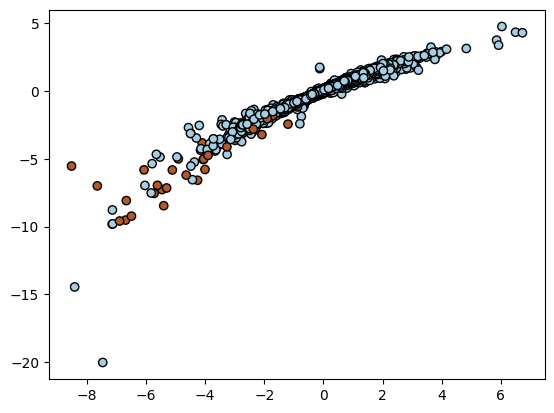

In [13]:
_, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor="k")
plt.show()

In [14]:
# k-fold

from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_val_predict

svc = svm.SVC()

scores = cross_val_score(svc, X, y, cv=5, scoring="accuracy")
yhat = cross_val_predict(svc, X, y, cv=5)

print(scores.mean())

0.9683241426644262


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc.fit(X_train, y_train)

SVC()

In [17]:
from sklearn import metrics

yhat = svc.predict(X_test)
test_acc = metrics.accuracy_score(y_test, yhat)
print(test_acc)

0.9640762463343109


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.67      0.08      0.14        51

    accuracy                           0.96      1364
   macro avg       0.82      0.54      0.56      1364
weighted avg       0.95      0.96      0.95      1364



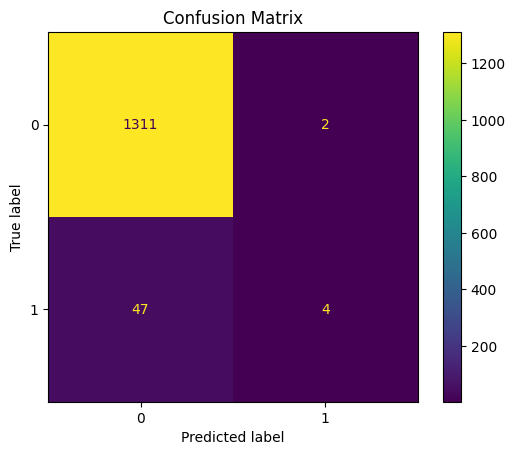

In [24]:
cm = confusion_matrix(y_test, yhat) 
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_disp.plot()
plt.title("Confusion Matrix")
plt.show()

##### 정확도는 매우 높으나, data가 imbalance하기 때문에 1에 대한 recall, f1-score값이 매우 낮게 나오는 것을 볼 수 있다.

---

## 오버 샘플링 (Over sampling)

##### 이전 강의 때는 y값 0과 1의 비율을 맞추기 위해 y값이 0인 data들을 삭제했다. (언더 샘플링, under sampling)

##### 언더 샘플링은 데이터 손실이 낮아 오히려 성능이 떨어질 수도 있다고 한다. 따라서 오버샘플링을 해보려고 한다.

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (5455, 2) (5455,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (10572, 2) (10572,)
SMOTE 적용 후 값의 분포 :
 0    5286
1    5286
dtype: int64


In [34]:
svc.fit(X_train_over, y_train_over)

SVC()

In [38]:
yhat = svc.predict(X_test)

In [39]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      1313
           1       0.15      0.82      0.26        51

    accuracy                           0.82      1364
   macro avg       0.57      0.82      0.58      1364
weighted avg       0.96      0.82      0.87      1364



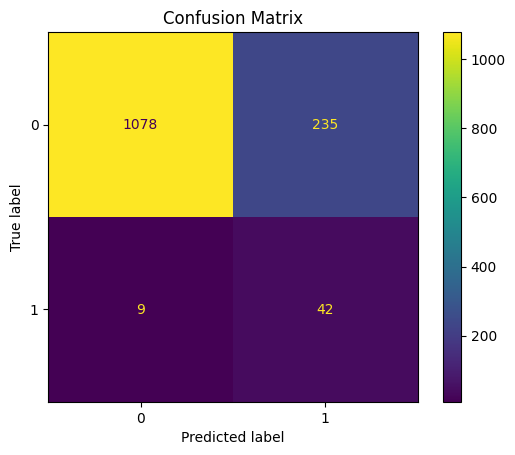

In [40]:
cm = confusion_matrix(y_test, yhat) 
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_disp.plot()
plt.title("Confusion Matrix")
plt.show()

##### over sampling을 하여 분류 한 결과, 1에 대한 recall은 올라갔으나 precision이 내려갔다는 것을 알 수 있다.

##### 어떤 결과가 더 나은지 정확히 모르겠으나, 투자자의 입장에서 기업의 파산여부를 예측하는 목적이라면 recall이 높은 것이 더 낫다고 보인다.